In [ ]:
%pip install seaborn

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from PIL import Image

In [15]:
import numpy as np

In [16]:
import seaborn as sns
sns.set_theme()

In [17]:
first = open("slurm-5805355.out").readlines()
continuation = open("slurm-5805355.out").readlines()

In [18]:
from collections import defaultdict

In [19]:
elosses = defaultdict(list)

for l in first[:]:
    if not l.startswith("Epoch:"):
        continue
    if "Total time" in l:
        continue
    
    epoch = int(l.split("]")[0].split("[")[1].strip())
    iteration = int(l.split("[")[2].split("/")[0].strip())
    loss = float(l.split("loss:")[1].split("(")[0].strip())
    
    elosses[epoch].append(loss)
    
for l in continuation[:]:
    if not l.startswith("Epoch:"):
        continue
    if "Total time" in l:
        continue
    
    epoch = int(l.split("]")[0].split("[")[1].strip())
    iteration = int(l.split("[")[2].split("/")[0].strip())
    loss = float(l.split("loss:")[1].split("(")[0].strip())
    
    elosses[epoch].append(loss)

In [20]:
display_train_loss = [sum(elosses[x]) / (len(elosses[x])+1) for x in list(elosses.keys())]

In [25]:
arr = np.array(Image.open("train_reconstructions/e0_i1001.png"))
imgs = []
padder = np.zeros(arr[59:427, 237:255].shape, dtype=int)
padder[:] = 0
for file in ["e0_i1001.png", "e11_i1001.png", "e22_i1001.png"]:
    file = "train_reconstructions/" + file
    arr = np.array(Image.open(file))
    imgs.append(arr[59:427, 237:420])
    imgs.append(padder)
    
predictions = np.concatenate(imgs[:-1], axis=1)

In [26]:
import pickle
val_d = pickle.load( open( "validation_losses.p", "rb" ) )
val_loss = [sum(x) / len(x) for k, x in val_d.items()]

### For presentation in Results: Epoch 0 train loss removed for readability

In [27]:
from matplotlib.patches import Circle

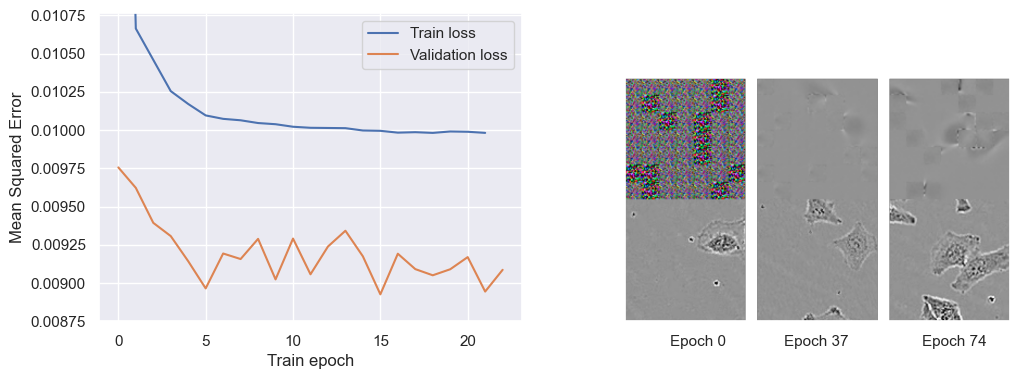

In [28]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

display_train_loss = [sum(elosses[x]) / (len(elosses[x])+1) for x in list(elosses.keys())]
display_val_loss = val_loss

#display_train_loss[0] = None

ax.flat[0].plot(display_train_loss, label="Train loss")
ax.flat[0].set_ylabel("Mean Squared Error")
ax.flat[0].set_xlabel("Train epoch")
ax.flat[0].plot(display_val_loss, label="Validation loss")
ax.flat[0].legend()
ax.flat[0].set_ylim(0.00875, display_train_loss[1] + 0.0001)

n = 100
display_predictions = np.pad(predictions, ((n, 0), (0, 0), (0, 0)), mode='constant', constant_values=0)
ax.flat[1].imshow(display_predictions)
ax.flat[1].get_yaxis().set_visible(False)
ax.flat[1].get_xaxis().set_visible(True)

ax.flat[1].set_xticks([110, 290, 500], ['Epoch 0', 'Epoch 37', 'Epoch 74'],
       rotation=0)
ax.flat[1].set_facecolor("white")
ax.flat[1].grid(False)


plt.savefig("pretrain1_results.pdf")

### For Appendix: Full plot!

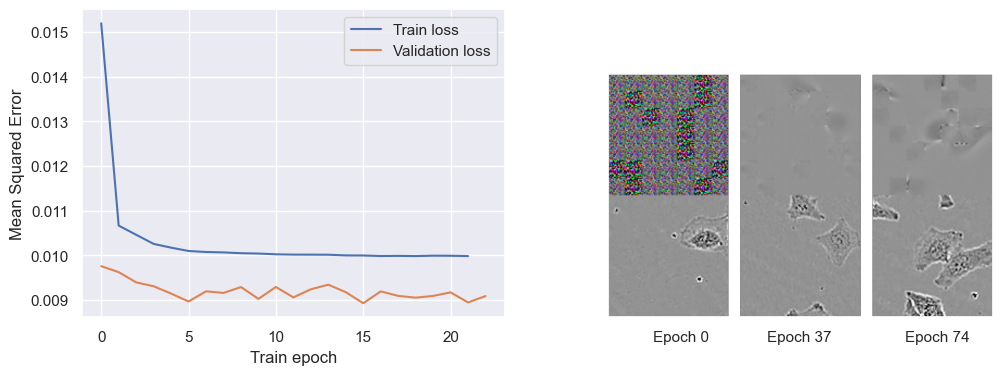

In [30]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

display_train_loss = [sum(elosses[x]) / (len(elosses[x])+1) for x in list(elosses.keys())]
display_val_loss = val_loss

ax.flat[0].plot(display_train_loss, label="Train loss")
ax.flat[0].set_ylabel("Mean Squared Error")
ax.flat[0].set_xlabel("Train epoch")
ax.flat[0].plot(display_val_loss, label="Validation loss")
ax.flat[0].legend()

n = 100
display_predictions = np.pad(predictions, ((n, 0), (0, 0), (0, 0)), mode='constant', constant_values=0)
ax.flat[1].imshow(display_predictions)
ax.flat[1].get_yaxis().set_visible(False)
ax.flat[1].get_xaxis().set_visible(True)

ax.flat[1].set_xticks([110, 290, 500], ['Epoch 0', 'Epoch 37', 'Epoch 74'],
       rotation=0)
ax.flat[1].set_facecolor("white")
ax.flat[1].grid(False)

plt.savefig("pretrain1_appendix.pdf")

## Appendix: Reconstruction grid for qualitative results

In [34]:
matplotlib.rc_file_defaults()

In [35]:
import os
import torch
import math

In [36]:
l = [x for x in os.listdir("predict_demo")]
l = [int(x.split(".pth")[0].split("-")[1]) for x in l]
max_epoch = max(l)

In [37]:
imgs = []
for i in range(max_epoch):
    arr = torch.load(f"predict_demo/checkpoint-{i}.pth_demo.pt")
    arr = np.array(arr)
    imgs.append(arr)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


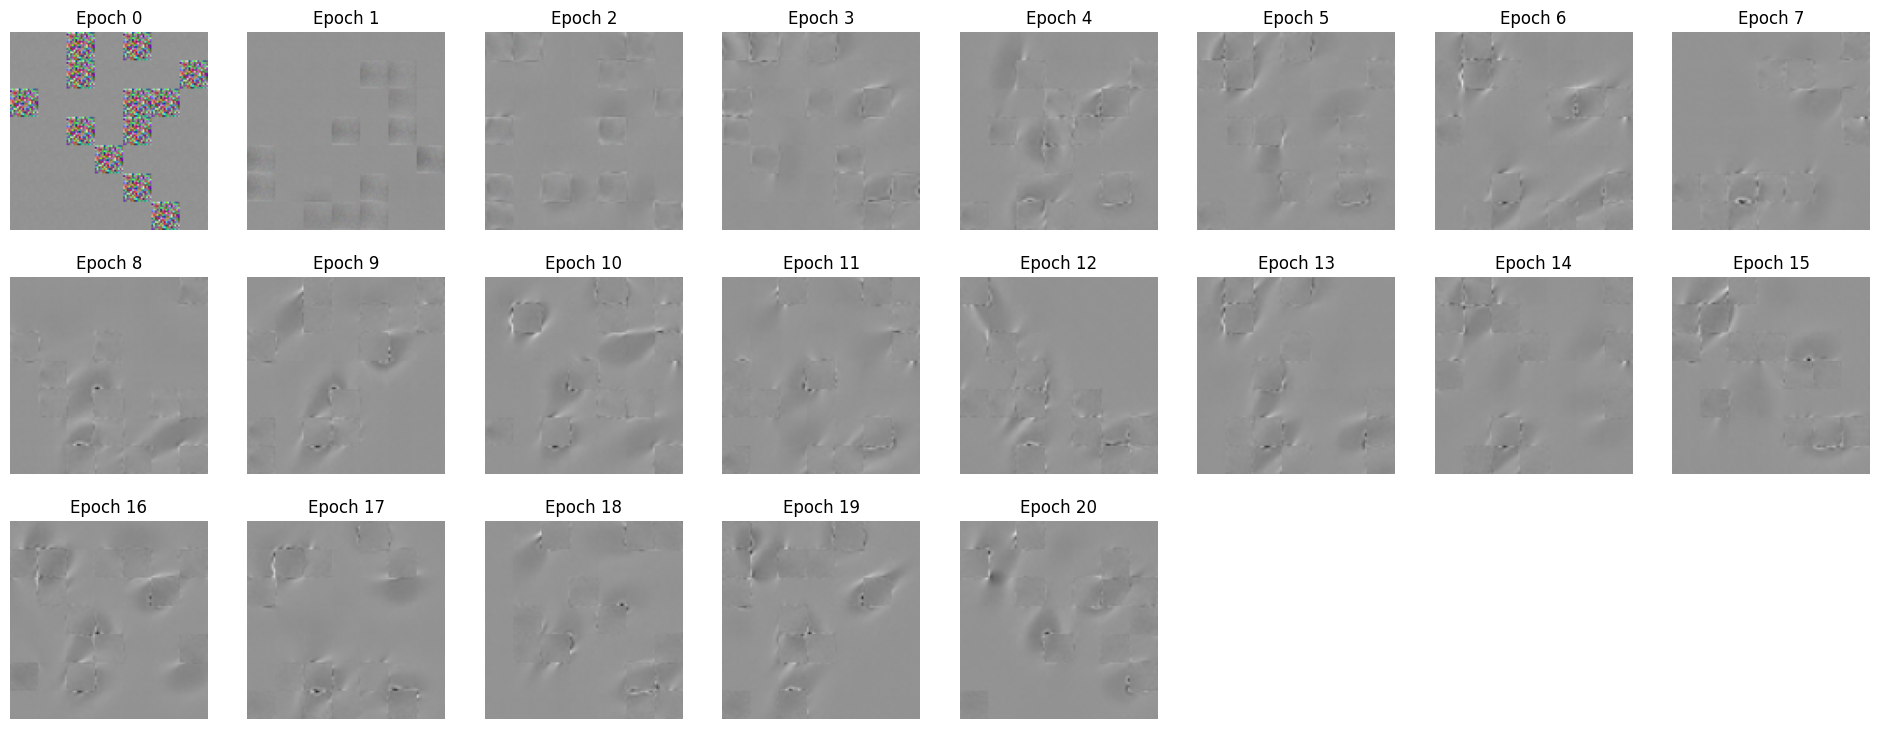

In [38]:
depth = (len(imgs) // 8) + 1
fig, ax = plt.subplots(depth, 8, figsize=(8*3, depth*3))

for idx, img in enumerate(imgs):
    ax.flat[idx].imshow(img)
    ax.flat[idx].axis("off")
    ax.flat[idx].set_title("Epoch " + str(idx))

# Disable the remaining axes that weren't used
for idx in range(len(imgs), depth * 8):
    ax.flat[idx].axis("off")
    
plt.savefig("demo_appendix.pdf")